# Logistic Regression
The dataset source is UCI Machine Learning repository
https://archive.ics.uci.edu/ml/datasets/bank+marketing
It is a direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The task is to classify whether the client will subscribe (1) or not (0) to a term deposit


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=20)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
#Read data
data = pd.read_csv('banking.csv', header=0)
data.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0


In [4]:
#Remove missing values
print("Data Shape: ",data.shape)
data = data.dropna()
print("Data Shape(Non NA): ",data.shape)

Data Shape:  (41188, 21)
Data Shape(Non NA):  (41188, 21)


In [5]:
#check the data size
print("The size of the data is = ", data.shape)
print()
print("The column names in the data are ")
print(list(data.columns))
print()

print("A snapshot of the data is shown below:")
print(data.head())
print()

The size of the data is =  (41188, 21)

The column names in the data are 
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

A snapshot of the data is shown below:
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1  

In [31]:
#print the values in education column
print("The values in the education column are:")
print(data['education'].unique())
print()

The values in the education column are:
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']



In [6]:
#Group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic” in the education column.
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
print("The values in the education column after changing education column  are:")
print(data['education'].unique())
print()

The values in the education column after changing education column  are:
['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']



Check whether the target variable y is balanced or not
0    36548
1     4640
Name: y, dtype: int64


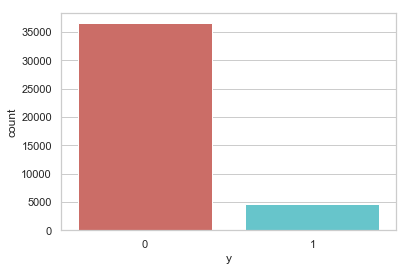



percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


<Figure size 432x288 with 0 Axes>

In [7]:
#Check the target 
print("Check whether the target variable y is balanced or not")
print(data['y'].value_counts())
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')
print()

count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
print()

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
#print("percentage of no subscription = ", pct_of_no_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

data.groupby('y').mean()

#Check if you find these observations: The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
#The pdays (days since the customer was last contacted) is lower for the customers who bought it. The lower the pdays, 
#the better the memory of the last call and hence the better chances of a sale.
#campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

data.groupby('marital').mean()




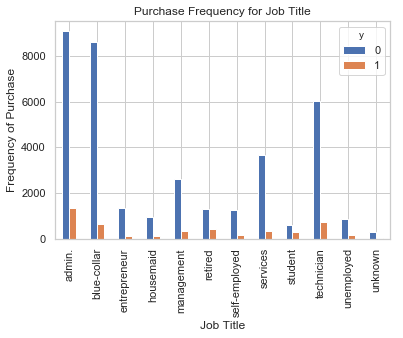

In [8]:
#Given that the frequency of purchase of the deposit depends a great deal on the job title. 
#Thus, the job title can be a good predictor of the outcome variable.
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job Title')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')



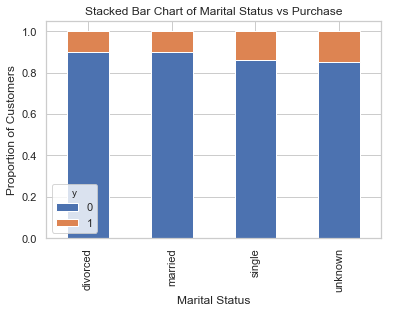

In [35]:
#The marital status does not seem to be a strong predictor for the outcome variable.
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')


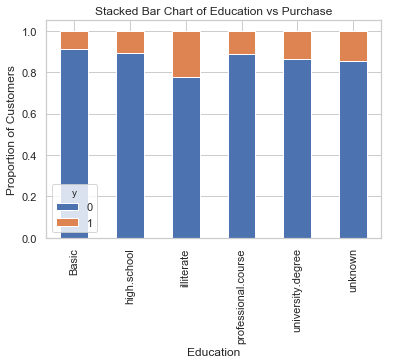

In [36]:
#Education seems a good predictor of the outcome variable.
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

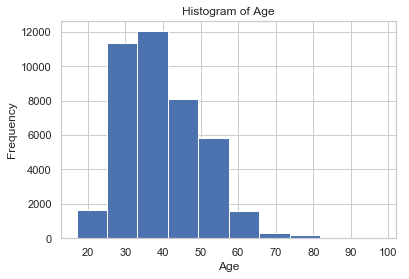

In [37]:
#Lets check whether most of the customers of the bank in this dataset are in the age range of 30–40.
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [38]:
#Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [39]:
#Lets use a selected list of features: customer’s job, marital status, whether he(she) has credit in default, whether he(she) has
#a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. 
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

print(data.head())

           job  marital  default housing loan     poutcome  y
0  blue-collar  married  unknown     yes   no  nonexistent  0
1   technician  married       no      no   no  nonexistent  0
2   management   single       no     yes   no      success  1
3     services  married       no      no   no  nonexistent  0
4      retired  married       no     yes   no      success  1


The features after dummification are:

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

snapshot of the data after dummification below:

   y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  0           0                1                 0              0   
1  0           0                0                 0              0   
2  1           0                0                 0              0   
3  0           0                0                 0              0

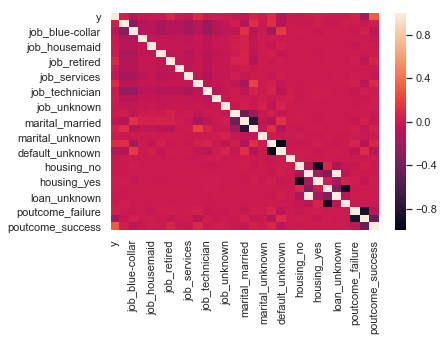

In [40]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

#data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
print("The features after dummification are:")
print()
print(data2.columns)
print()

print("snapshot of the data after dummification below:")
print()
print(data2.head())

sns.heatmap(data2.corr())
plt.show()

In [41]:
#Split data into training and testing sets
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
#Build logistic regression classifier
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix below:")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print()


print('Accuracy of logistic regression classifier on test set = {:.2f}'.format(classifier.score(X_test, y_test)))
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



Confusion Matrix below:
[[9046  110]
 [ 912  229]]

Accuracy of logistic regression classifier on test set = 0.90

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

   micro avg       0.90      0.90      0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
